In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

In [2]:
#adjust parameters here

stock_title = 'IBM'
stock_link = 'https://query1.finance.yahoo.com/v7/finance/download/IBM?period1=1491955200&period2=1649721600&interval=1d&events=history&includeAdjustedClose=true'
date_split_train_test = '2022-02'
step = 20 #to predict ahead (date_split_train_test shoud be valid with the step, ex; later than 2022-02 should be 20 or more days)
epochs = 50


In [3]:
df = pd.read_csv(stock_link, index_col='Date')
df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-12,163.518158,163.671127,162.543015,163.154877,127.947723,3427637
2017-04-13,162.447418,163.824097,162.074570,162.074570,127.100533,3352953
2017-04-17,162.284897,163.766724,162.160614,163.575531,128.277603,3891329
2017-04-18,163.279160,164.139572,162.361374,162.571701,127.490417,6637393
2017-04-19,154.646271,155.487579,152.581268,154.579346,121.222733,20171378


In [4]:
df.isnull().sum()
df = df.Close
df.head()

Date
2017-04-12    163.154877
2017-04-13    162.074570
2017-04-17    163.575531
2017-04-18    162.571701
2017-04-19    154.579346
Name: Close, dtype: float64

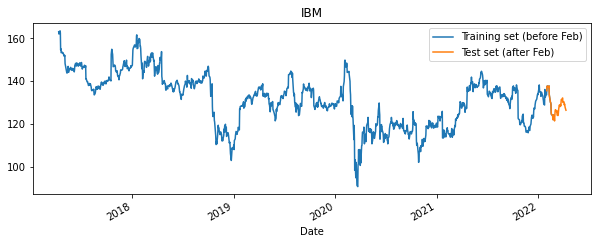

In [5]:
df[:date_split_train_test].plot(figsize=(10,3.5), legend=True)
df[date_split_train_test:].plot(figsize=(10,3.5), legend=True)
plt.legend(['Training set (before Feb)', 'Test set (after Feb)'])
plt.title(stock_title)
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

data = df.values.reshape(-1,1)
sc = MinMaxScaler()
data_sc = sc.fit_transform(data)

In [7]:
def convertToMatrix(data, step=1):
    X, Y = [],[]
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,]) #Training data from i to i + d
        Y.append(data[d,]) #Target data d
    return np.array(X), np.array(Y)

n_train = df[:date_split_train_test].shape[0]
train, test = data_sc[0:n_train], data_sc[n_train:]
print(train.shape, test.shape)

(1229, 1) (30, 1)


In [8]:
X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)
print("Train, Test of X ", X_train.shape, X_test.shape)
print("Train, Test of y ", y_train.shape, y_test.shape)

Train, Test of X  (1209, 20, 1) (10, 20, 1)
Train, Test of y  (1209, 1) (10, 1)


In [9]:
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape = (step,1), activation='relu'),
    Dropout(0.2),
    GRU(units=4, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 4)                 672       
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 8,627
Trainable params: 8,627
Non-trainable params: 0
_________________________________________________________________


2022-04-12 14:43:48.990669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-12 14:43:48.990749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

Epoch 1/50


2022-04-12 14:43:49.107715: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-12 14:43:49.657831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 30s 775ms/step - loss: 0.1383
Epoch 2/50
38/38 [==============================] - 32s 839ms/step - loss: 0.0678
Epoch 3/50
38/38 [==============================] - 31s 811ms/step - loss: 0.0395
Epoch 4/50
38/38 [==============================] - 31s 816ms/step - loss: 0.0326
Epoch 5/50
38/38 [==============================] - 35s 914ms/step - loss: 0.0289
Epoch 6/50
38/38 [==============================] - 40s 1s/step - loss: 0.0242
Epoch 7/50
38/38 [==============================] - 38s 999ms/step - loss: 0.0215
Epoch 8/50
38/38 [==============================] - 42s 1s/step - loss: 0.0201
Epoch 9/50
38/38 [==============================] - 43s 1s/step - loss: 0.0188
Epoch 10/50
38/38 [==============================] - 41s 1s/step - loss: 0.0154
Epoch 11/50
38/38 [==============================] - 40s 1s/step - loss: 0.0152
Epoch 12/50
38/38 [==============================] - 43s 1s/step - loss: 0.0144
Epoch 13/50
38/38 [=======================

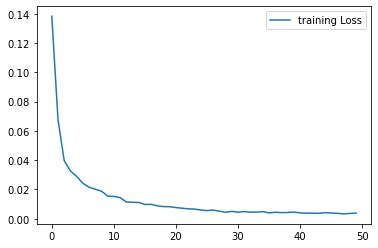

In [11]:
plt.plot(history.history['loss'], label="training Loss")
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
pred = model.predict(X_test)
pred_inv = sc.inverse_transform(pred)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv, pred_inv)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, pred_inv))

print('R2: {:.3f}'.format(r2_test))
print('RMSE: {:.3f}'.format(rmse_test))

2022-04-12 15:19:26.115624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


R2: 0.559
RMSE: 1.119


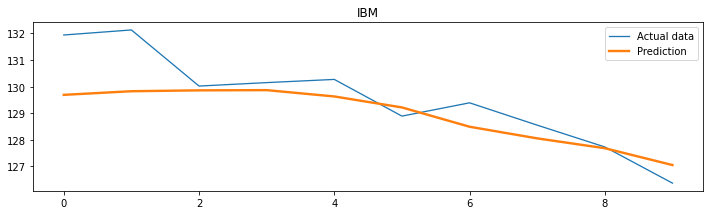

In [13]:
plt.figure(figsize=(12,3.1))
plt.plot(y_test_inv, lw=1.3, label='Actual data')
plt.plot(pred_inv, lw=2.4, label='Prediction')
plt.title(stock_title)
plt.legend()
plt.show()

2022-04-12 15:36:36.734053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


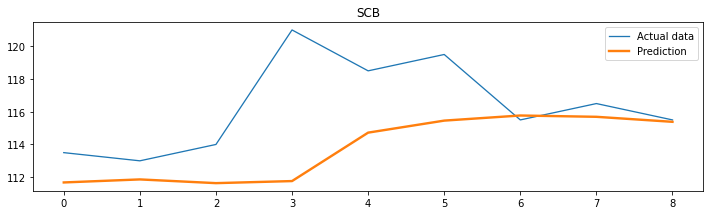

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#try with other stock

stock_title = 'SCB'
stock_link = 'https://query1.finance.yahoo.com/v7/finance/download/SCB.BK?period1=1491955200&period2=1649721600&interval=1d&events=history&includeAdjustedClose=true'
date_split_train_test = '2022-02'
step = 20 #to predict ahead (date_split_train_test shoud be valid with the step, ex; later than 2022-02 should be 20 or more days)
epochs = 50

df = pd.read_csv(stock_link, index_col='Date')
df.index = pd.to_datetime(df.index)
df = df.Close
data = df.values.reshape(-1,1)
sc = MinMaxScaler()
data_sc = sc.fit_transform(data)

def convertToMatrix(data, step=1):
    X, Y = [],[]
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,]) #Training data from i to i + d
        Y.append(data[d,]) #Target data d
    return np.array(X), np.array(Y)

n_train = df[:date_split_train_test].shape[0]
train, test = data_sc[0:n_train], data_sc[n_train:]
X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

model = tf.keras.models.load_model('stock_prediction_model/')
pred = model.predict(X_test)
pred_inv = sc.inverse_transform(pred)
y_test_inv = sc.inverse_transform(y_test)

plt.figure(figsize=(12,3.1))
plt.plot(y_test_inv, lw=1.3, label='Actual data')
plt.plot(pred_inv, lw=2.4, label='Prediction')
plt.title(stock_title)
plt.legend()
plt.show()

In [20]:
model.save('stock_prediction_model/')

2022-04-12 15:31:40.039386: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: stock_prediction_model/assets
